In [81]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,10)

df = pd.read_csv("C:/Users/User/Downloads/movies.csv")


In [82]:
#Examining the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [84]:
#Looking for missing values
df.isnull().sum()
#Verifying the df.info() results

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [85]:
#Erasing rows with empty cells, replacing with median isn't meaningfull here
df.dropna(inplace= True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [86]:
#Droping duplicates
df["name"].drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [87]:
#Sorting the dataframe based on grossing
df.sort_values(by=['gross'],inplace= True,ascending= False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


<AxesSubplot:>

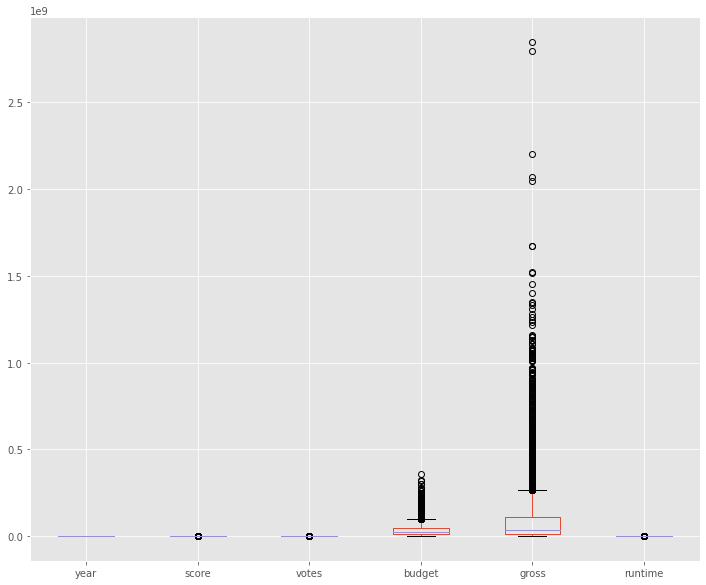

In [107]:
#Plotting a boxplot of numerical values to see outliers
df.boxplot()

<AxesSubplot:xlabel='budget', ylabel='gross'>

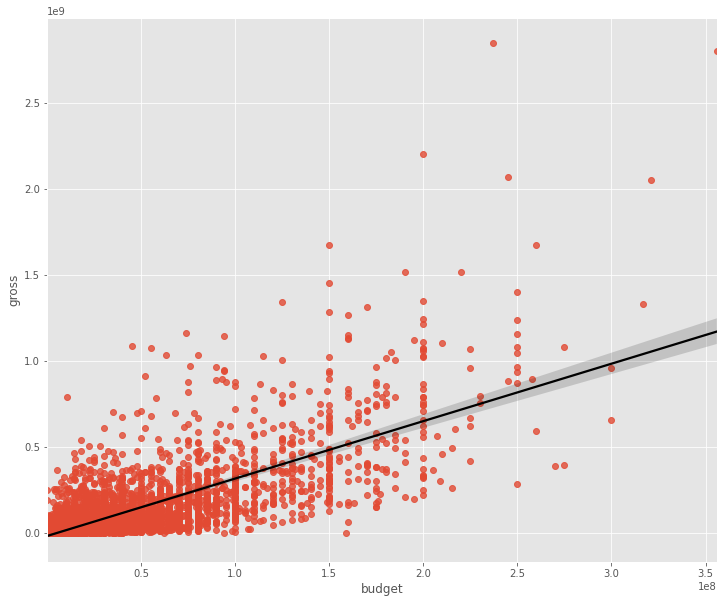

In [88]:
#Finding correlation through visualization
sns.regplot( x="budget",y="gross", data=df,line_kws={"color":"black"})

<AxesSubplot:xlabel='score', ylabel='gross'>

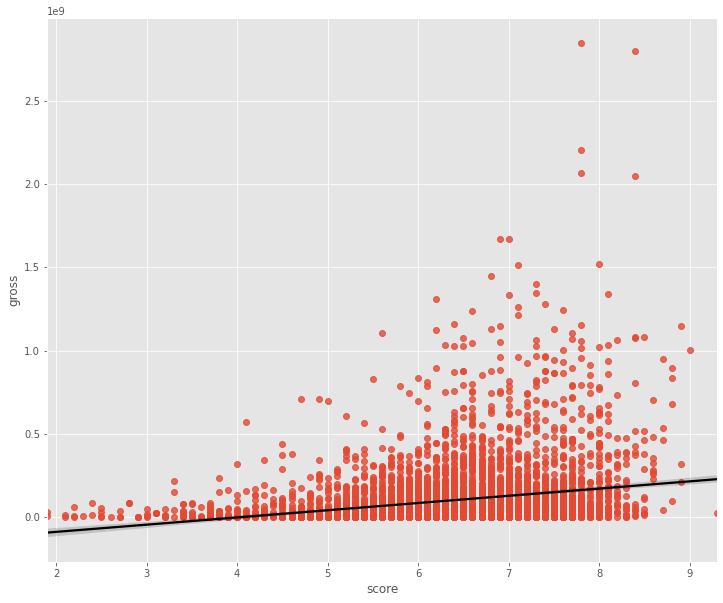

In [89]:
sns.regplot( x="score",y="gross", data=df,line_kws={"color":"black"})

<AxesSubplot:xlabel='runtime', ylabel='gross'>

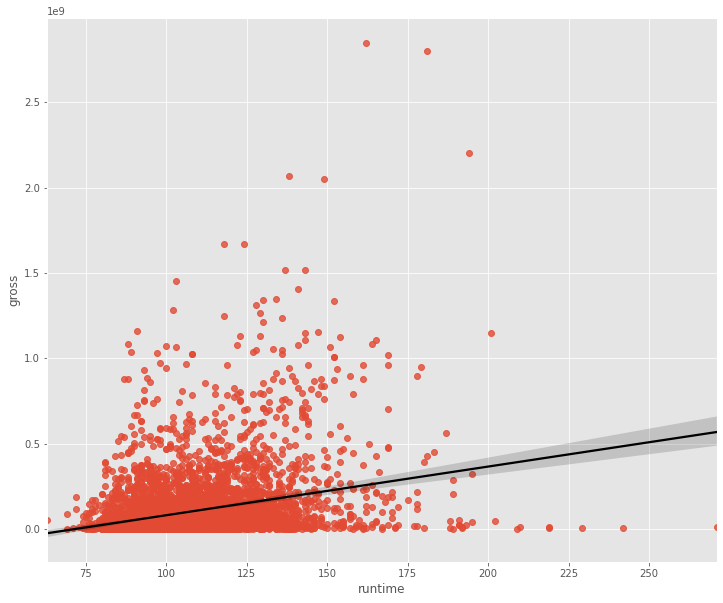

In [90]:
sns.regplot( x="runtime",y="gross", data=df,line_kws={"color":"black"})

In [ ]:
#Judging from the reg plots there is no clear correlation between gross revenue and runtime or score
#There is a correlation between budget and gross revenue

In [91]:
#We can verify the correlations(pearson) numerically
df.corr()['gross'].sort_values()

score      0.222556
year       0.274321
runtime    0.275796
votes      0.614751
budget     0.740247
gross      1.000000
Name: gross, dtype: float64

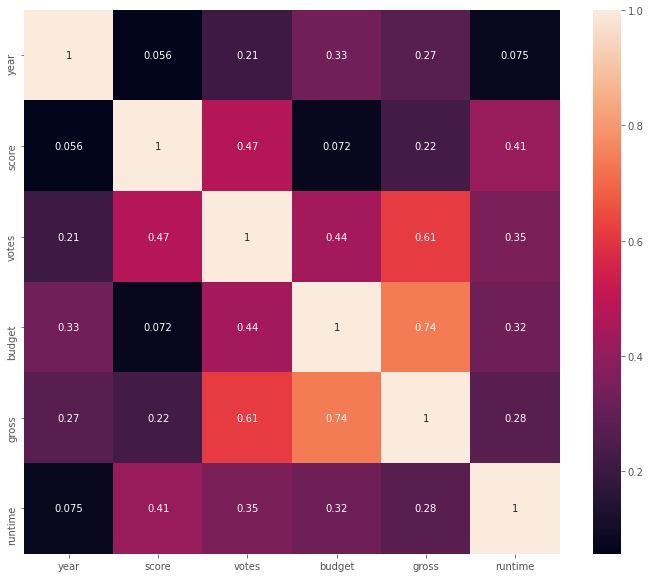

In [104]:
#We can see that gross is highly correlated with budget and votes
#And visualy
sns.heatmap(df.corr(),annot= True);

In [103]:
#Checking pearson coefficient and p value to get a final verdict on our result
pearson_coef,p_value=scipy.stats.pearsonr(df['budget'],df['gross'])
print(pearson_coef)
print(format(p_value, ".4f"))

0.7402465439219631
0.0000


In [ ]:
#Pearson coefficient close to 1 and p value < 0,001 so there strong certainty in the result

In [108]:
#Similarly with votes
pearson_coef1,p_value1=scipy.stats.pearsonr(df['votes'],df['gross'])
print(pearson_coef1)
print(format(p_value1, ".4f"))

0.6147512368504806
0.0000


In [ ]:
#Pearson coefficient close to 1 and p value < 0,001 so there strong certainty in the result

In [ ]:
#Votes and Budget are the values mostly correlated to Gross Revenue